<div class="alert alert-danger" style="color:black; font-family: 'Courier New';"> 
  <h1>Linear Discriminant Analysis </h1>
    We have the Iris dataset, which has 3 classes <span style="color:blue">'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'</span>. Each class has 50 samples. Each sample is represented by four features <span style="color:blue">Sepal_length, Sepal_height, Petal_length, Petal_height.</span> We would apply to reduce the dimenion using LDA. <br>
  <span style="color:red"> Objective Function: To minimize the intra class varianc and to maximize the inter class distance </span> 
  <img src="images/iris_with_labels.jpg" width="300" height="300">

</div>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
dataset_path = "dataset/Iris/iris.data"

In [62]:
data = pd.read_csv(dataset_path,names=["Sepal_length", "Sepal_height", "Petal_length", "Petal_height", "Class_name"])
data.head(10)

,Sepal_length,Sepal_height,Petal_length,Petal_height,Class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Iris-setosa class population: 50
Iris-versicolor class population: 50
Iris-versicolor class population: 50


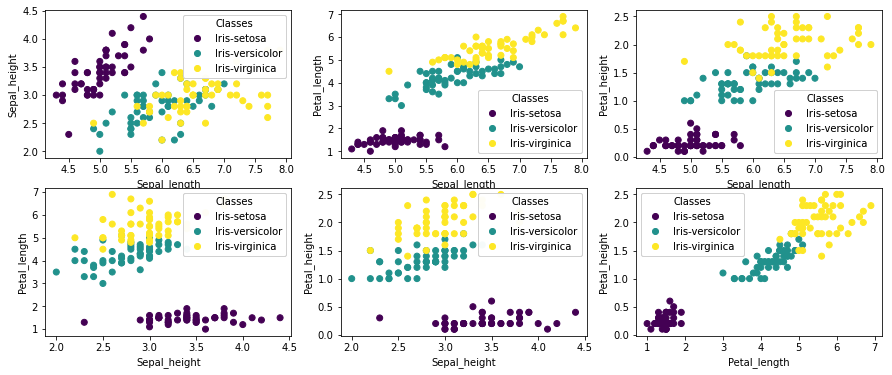

In [63]:
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
labels = list(data["Class_name"].values)
print("Iris-setosa class population:",labels.count("Iris-setosa"))
print("Iris-versicolor class population:",labels.count("Iris-versicolor"))
print("Iris-versicolor class population:",labels.count("Iris-virginica"))
labels_categorical = [class_names.index(item) for item in labels]
Sepal_length = list(data["Sepal_length"].values)
Sepal_height = list(data["Sepal_height"].values)
Petal_length = list(data["Petal_length"].values)
Petal_height =list(data["Petal_height"].values)

# Plot the sample distribution "Sepal_length VS Sepal_height"
fig, ax = plt.subplots(nrows = 2, ncols = 3,figsize=(15, 6))
# produce a legend with the unique colors from the scatter
scatter = ax[0,0].scatter(Sepal_length, Sepal_height, c=labels_categorical)
legend = ax[0,0].legend(handles=scatter.legend_elements()[0], labels=class_names,loc="upper right", title="Classes")
ax[0,0].add_artist(legend)
ax[0,0].set_xlabel('Sepal_length')
ax[0,0].set_ylabel('Sepal_height')


# produce a legend with the unique colors from the scatter
scatter = ax[0,1].scatter(Sepal_length, Petal_length, c=labels_categorical)
legend = ax[0,1].legend(handles=scatter.legend_elements()[0], labels=class_names,loc="lower right", title="Classes")
ax[0,1].add_artist(legend)
ax[0,1].set_xlabel('Sepal_length')
ax[0,1].set_ylabel('Petal_length')

# produce a legend with the unique colors from the scatter
scatter = ax[0,2].scatter(Sepal_length, Petal_height, c=labels_categorical)
legend = ax[0,2].legend(handles=scatter.legend_elements()[0], labels=class_names,loc="lower right", title="Classes")
ax[0,2].add_artist(legend)
ax[0,2].set_xlabel('Sepal_length')
ax[0,2].set_ylabel('Petal_height')


# produce a legend with the unique colors from the scatter
scatter = ax[1,0].scatter(Sepal_height, Petal_length, c=labels_categorical)
legend = ax[1,0].legend(handles=scatter.legend_elements()[0], labels=class_names,loc="upper right", title="Classes")
ax[1,0].add_artist(legend)
ax[1,0].set_xlabel('Sepal_height')
ax[1,0].set_ylabel('Petal_length')

# produce a legend with the unique colors from the scatter
scatter = ax[1,1].scatter(Sepal_height, Petal_height, c=labels_categorical)
legend = ax[1,1].legend(handles=scatter.legend_elements()[0], labels=class_names,loc="upper right", title="Classes")
ax[1,1].add_artist(legend)
ax[1,1].set_xlabel('Sepal_height')
ax[1,1].set_ylabel('Petal_height')

# produce a legend with the unique colors from the scatter
scatter = ax[1,2].scatter(Petal_length, Petal_height, c=labels_categorical)
legend = ax[1,2].legend(handles=scatter.legend_elements()[0], labels=class_names,loc="upper left", title="Classes")
ax[1,2].add_artist(legend)
ax[1,2].set_xlabel('Petal_length')
ax[1,2].set_ylabel('Petal_height')

plt.show()

In [64]:
X = np.array([Sepal_length, Sepal_height, Petal_length, Petal_height]).T
target = labels_categorical
X1=[];X2=[];X3=[]
index=0
for item in target:
    if item==0:
        X1.append(X[index])
    if item==1:
        X2.append(X[index])
    if item==2:
        X3.append(X[index])
    index=index+1
X1=np.array(X1);X2=np.array(X2);X3=np.array(X3)
print("First Class Population:",X1.shape)
print("Second Class Population:",X2.shape)
print("Third Class Population:",X3.shape)

# Calculating mean of each class
m1=np.mean(X1 , axis = 0).reshape((1,4))
m2=np.mean(X2 , axis = 0).reshape((1,4))
m3=np.mean(X3 , axis = 0).reshape((1,4))
m=np.mean([m1,m2,m3],axis=0).reshape((1,4))

print(m1.shape,m.shape)

# Calculating the within class scatter matrix
# calculating the covariance matrix of the mean-centered data.
cov_mat_c1 = np.cov(X1,rowvar = False)
cov_mat_c2 = np.cov(X2,rowvar = False)
cov_mat_c3 = np.cov(X3,rowvar = False)
Sw=cov_mat_c1+cov_mat_c2+cov_mat_c3
print("Covariance Matrix:\n",cov_mat_c1.shape,Sw.shape)

# Calculating the between class scatter matrix
Sb1=X1.shape[0]*(m1-m)*((m1-m).T)
Sb2=X2.shape[0]*(m2-m)*((m3-m).T)
Sb3=X3.shape[0]*(m3-m)*((m3-m).T)
Sb=Sb1+Sb2+Sb3
print(Sb1.shape, Sb.shape)

# Calculate the inverse of within class scatter matrix
inv_sw = np.linalg.inv(Sw)
print(inv_sw.shape)

# estimating cost function
cost = inv_sw * Sb
print(cost.shape)

#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cost)
print("Eigen values:\n",eigen_values)
print("Eigen vectors:\n",eigen_vectors)

#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
explained_varaince=(np.sum(sorted_eigenvalue[0:n_components])/np.sum(sorted_eigenvalue))*100
print("Explained variance:{}%".format(explained_varaince))
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X.transpose()).transpose()
print("Transformed data:",X_reduced.shape)

First Class Population: (50, 4)
Second Class Population: (50, 4)
Third Class Population: (50, 4)
(1, 4) (1, 4)
Covariance Matrix:
 (4, 4) (4, 4)
(4, 4) (4, 4)
(4, 4)
(4, 4)
Eigen values:
 [  23.49593942  121.13102909  825.60937502 2665.11948123]
Eigen vectors:
 [[-0.22671705  0.94017505 -0.14860212 -0.2063678 ]
 [ 0.96708222  0.23745071  0.0823091  -0.03992924]
 [-0.04966941  0.24040474  0.33189812  0.910814  ]
 [-0.10432784  0.04351552  0.92789345 -0.35529683]]
Explained variance:96.02165577483748%
Transformed data: (150, 2)


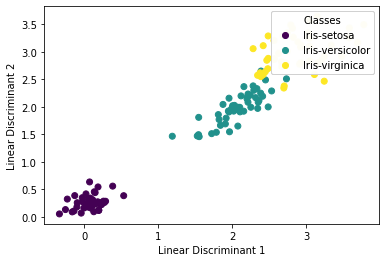

In [65]:
if n_components==2:
    # Plot the sample distribution "Sepal_length VS Sepal_height"
    fig, ax = plt.subplots()
    # produce a legend with the unique colors from the scatter
    scatter = ax.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_categorical)
    legend = ax.legend(handles=scatter.legend_elements()[0], labels=class_names,loc="upper right", title="Classes")
    ax.add_artist(legend)
    ax.set_xlabel('Linear Discriminant 1')
    ax.set_ylabel('Linear Discriminant 2')
    plt.show()
if n_components==3:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.view_init(elev=41, azim=-48)
    scatter = ax.scatter(X_reduced[:,0], X_reduced[:,1],X_reduced[:,2], c=labels_categorical)
    legend = ax.legend(handles=scatter.legend_elements()[0], labels=class_names,loc="upper right", title="Classes")
    ax.add_artist(legend)
    ax.set_xlabel('Linear Discriminant 1')
    ax.set_ylabel('Linear Discriminant 2')
    ax.set_zlabel('Linear Discriminant 3')
    plt.show()
    
